# Customer Retention Prediction - Projet ENSAE 2A
Par Khaled Mansour

L'objectif de ce notebook est de prédire si un client va baratter ou retourner pour les prochaines commandes sur un site de e-commerce d'une entreprise basée à Berlin. Les données sont la propriété intellectuelle de l'université Humboldt à Berlin et une permission du Professeur Lessmann a été prise pour la réutulisation de ces données pour le project python 2A au sein de ENSAE ParisTech.

# 1. Introduction

# 2. Data Preprocessing

In [32]:
## import liabrires #####
import pandas as pd
import numpy as np
from sklearn import svm, linear_model, datasets, metrics
from sklearn.preprocessing import LabelEncoder, scale
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###### import train and test data ####
train = pd.read_csv("Data/train.csv" , sep =",", index_col="ID")
test = pd.read_csv("Data/test.csv" , sep =",", index_col = "ID")
train.head(10)

,Unnamed: 0,order_date,form_of_address,title,email_domain,account_creation_date,newsletter,model,payment,delivery,...,schoolbook_count,ebook_count,audiobook_count,audiobook_download_count,film_count,musical_count,hardware_count,imported_count,other_count,return_customer
ID,,,,,,,,,,,,,,,,,,,,,
1,1,2013-12-01,Mr,0,web.de,2013-12-01,0,2,Transfer from current account,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2013-12-16,Mrs,0,gmx.de,2013-12-16,0,1,Cash payment,1,...,0,0,0,0,0,0,0,0,0,0
3,3,2013-08-19,Mr,0,other,2013-08-19,0,1,Invoice,0,...,0,0,0,0,0,0,0,1,0,0
4,4,2013-06-16,Other,0,t-online.de,2013-06-16,0,1,Invoice,0,...,0,0,0,2,0,0,0,0,0,0
5,5,2013-08-08,Mr,0,arcor.de,2013-08-08,0,1,Cash payment,1,...,2,0,0,0,0,0,0,0,0,0
6,6,2013-08-10,Mr,0,other,2013-08-10,0,1,Invoice,0,...,0,0,0,0,0,0,0,0,0,0
7,7,2013-12-21,Mr,0,other,2013-12-21,0,3,Cash payment,1,...,0,0,0,0,0,0,0,0,0,0
8,8,2013-09-04,Mr,0,web.de,2013-09-04,0,3,Cash payment,1,...,0,0,0,0,0,0,0,0,0,0
9,9,2013-06-25,Mr,0,other,2013-06-24,0,1,Transfer from credit card,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train.columns

Index(['Unnamed: 0', 'order_date', 'form_of_address', 'title', 'email_domain',
       'account_creation_date', 'newsletter', 'model', 'payment', 'delivery',
       'postcode_invoice', 'postcode_delivery', 'coupon', 'advertising_code',
       'goods_value', 'item_count', 'giftwrapping', 'referrer',
       'points_redeemed', 'cost_shipping', 'deliverydate_estimated',
       'deliverydate_actual', 'weight', 'remitted_items', 'canceled_items',
       'used_items', 'book_count', 'paperback_count', 'schoolbook_count',
       'ebook_count', 'audiobook_count', 'audiobook_download_count',
       'film_count', 'musical_count', 'hardware_count', 'imported_count',
       'other_count', 'return_customer'],
      dtype='object')

In [34]:
train = train.drop('Unnamed: 0', 1)
test = test.drop('Unnamed: 0', 1)
train.head()
test.head()

,order_date,form_of_address,title,email_domain,account_creation_date,newsletter,model,payment,delivery,postcode_invoice,...,schoolbook_count,ebook_count,audiobook_count,audiobook_download_count,film_count,musical_count,hardware_count,imported_count,other_count,return_customer
ID,,,,,,,,,,,,,,,,,,,,,
51885,2013-06-12,Other,0,web.de,2013-06-12,0,1,Transfer from current account,0,92,...,1,0,0,0,0,0,0,0,0,NaN
51886,2013-09-22,Mrs,0,t-online.de,2013-09-22,0,3,Transfer from current account,0,65,...,0,0,0,0,0,0,0,0,0,NaN
51887,2013-09-19,Mrs,0,freenet.de,2013-09-19,0,1,Transfer from credit card,0,76,...,0,0,0,0,0,0,0,0,0,NaN
51888,2013-04-18,Mrs,0,gmail.com,2013-04-18,0,2,Transfer from credit card,0,52,...,0,0,5,0,0,2,0,0,0,NaN
51889,2013-09-08,Mrs,0,yahoo.de,2013-09-08,0,3,Transfer from current account,0,23,...,2,0,0,0,0,0,0,0,0,NaN


In [35]:
train.head()

,order_date,form_of_address,title,email_domain,account_creation_date,newsletter,model,payment,delivery,postcode_invoice,...,schoolbook_count,ebook_count,audiobook_count,audiobook_download_count,film_count,musical_count,hardware_count,imported_count,other_count,return_customer
ID,,,,,,,,,,,,,,,,,,,,,
1,2013-12-01,Mr,0,web.de,2013-12-01,0,2,Transfer from current account,0,58,...,0,0,0,0,0,0,0,0,0,0
2,2013-12-16,Mrs,0,gmx.de,2013-12-16,0,1,Cash payment,1,34,...,0,0,0,0,0,0,0,0,0,0
3,2013-08-19,Mr,0,other,2013-08-19,0,1,Invoice,0,51,...,0,0,0,0,0,0,0,1,0,0
4,2013-06-16,Other,0,t-online.de,2013-06-16,0,1,Invoice,0,25,...,0,0,0,2,0,0,0,0,0,0
5,2013-08-08,Mr,0,arcor.de,2013-08-08,0,1,Cash payment,1,41,...,2,0,0,0,0,0,0,0,0,0


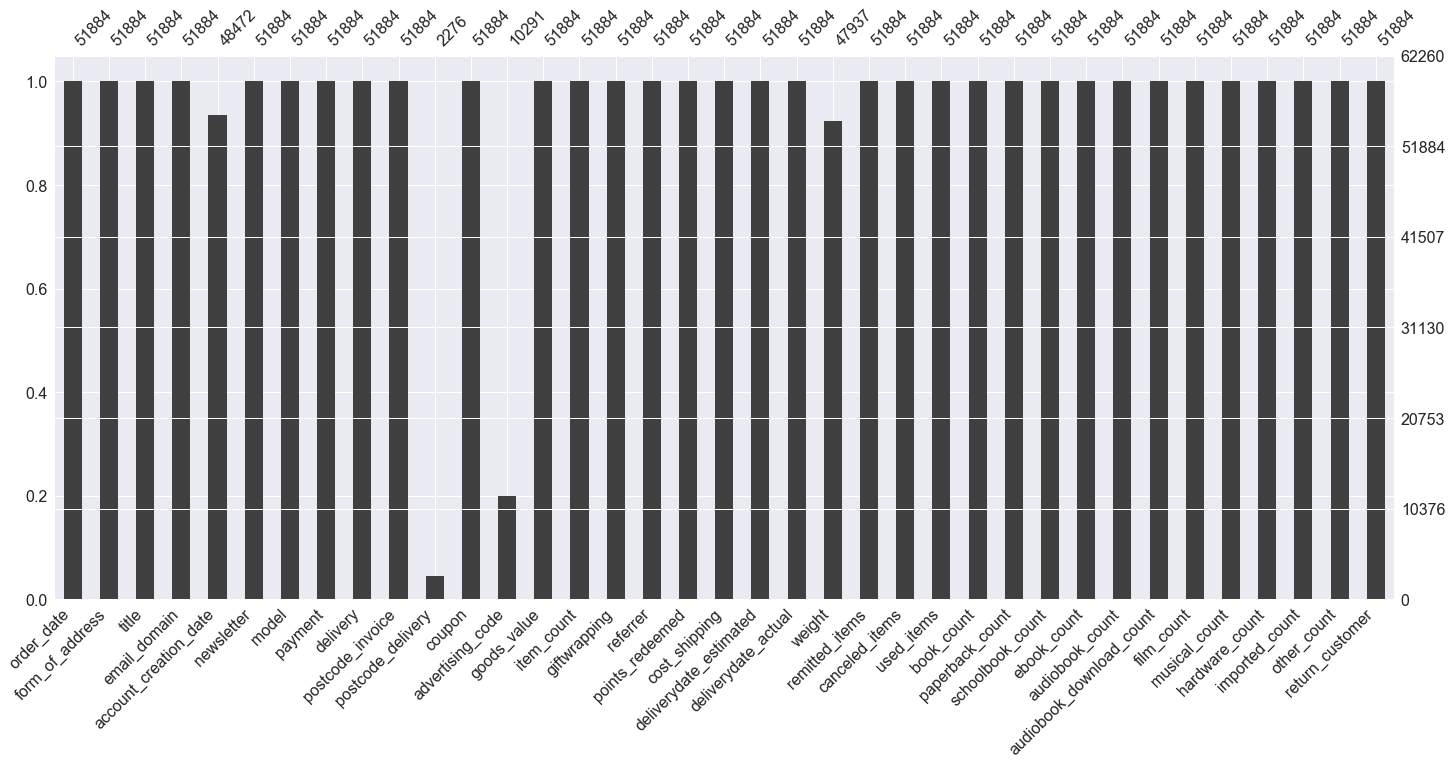

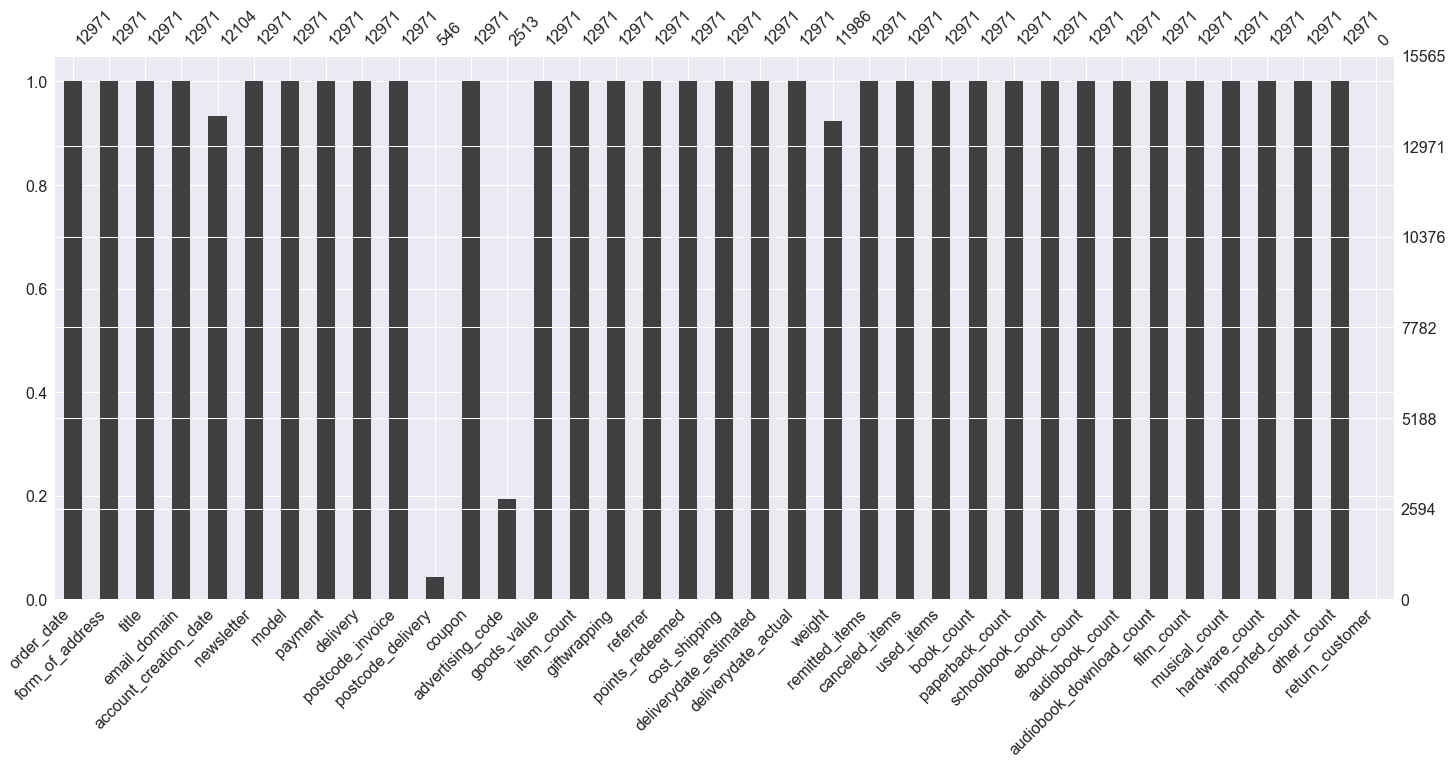

In [36]:
## we visualize missing values Vs observed values in both train and test data 
import missingno as msno
msno.bar(train)
msno.bar(test)

When dealing with missing values , out of the 37 variables , account creation date and weight variables have 10% of missing values from all observations. However, postcode_delivery and advertising_code have around 95% and 77% of missing values respectively

In [37]:
## binding test and train for data preprocessing
comdata= pd.concat([train,test])
comdata.describe
comdata.info()
comdata.return_customer.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64855 entries, 1 to 64855
Data columns (total 37 columns):
order_date                  64855 non-null object
form_of_address             64855 non-null object
title                       64855 non-null int64
email_domain                64855 non-null object
account_creation_date       60576 non-null object
newsletter                  64855 non-null int64
model                       64855 non-null int64
payment                     64855 non-null object
delivery                    64855 non-null int64
postcode_invoice            64855 non-null int64
postcode_delivery           2822 non-null float64
coupon                      64855 non-null int64
advertising_code            12804 non-null object
goods_value                 64855 non-null int64
item_count                  64855 non-null int64
giftwrapping                64855 non-null int64
referrer                    64855 non-null int64
points_redeemed             64855 non-null int64
co

count    51884.000000
mean         0.188363
std          0.391005
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: return_customer, dtype: float64

## Dealing with missing values

In [38]:
#1. Postcode_delivery is missing more than 90% of observations. Imputing these values will be a strong assumption. 
#However, one possible assumption behind this large amount of missing values is that postcode_delivery is same as postcode_invoice. 
#Therefore this variable will be dropped from the next analysis and predictions and only postcode_invoice will be taken into consideration
comdata = comdata.drop('postcode_delivery', 1)
#2. weight : this varaible will be dropped as well assuming that it has no effect on customer churn or retention 
#since the information of weight is provided on the website and it is the customer willingness to choose the product knowing the weight
# thus it should not prevent him from returning. Also many products are downloadable and dont have any weight which explains the missing values
comdata = comdata.drop('weight', 1)


In [39]:
#3. Advertising code : a dummy variable will be created instead taking the value 1 if an advertising code as been used and 0 if not
comdata.advertising_code.loc[~comdata.advertising_code.isnull()] = 1  # not nan
comdata.advertising_code.loc[comdata.advertising_code.isnull()] = 0 #nan
comdata.advertising_code.describe
comdata.columns[comdata.isnull().any()]

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Index(['account_creation_date', 'return_customer'], dtype='object')

In [40]:
comdata.shape

(64855, 35)

In [41]:
#4 : account creation date : first we create a new variable "timelapse_to_order" in order to calculate the time gap between creating 
# an account and making an order. In order to do this , both order_date and account_creation_date have to be converted to datetime
import datetime
comdata.order_date = pd.to_datetime(comdata.order_date, format='%Y-%m-%d')
comdata.account_creation_date = pd.to_datetime(comdata.account_creation_date , format='%Y-%m-%d')
comdata['timelapse_to_order'] = (comdata['order_date'] - comdata['account_creation_date']).abs().dt.days
comdata.groupby('timelapse_to_order').count()


,order_date,form_of_address,title,email_domain,account_creation_date,newsletter,model,payment,delivery,postcode_invoice,...,schoolbook_count,ebook_count,audiobook_count,audiobook_download_count,film_count,musical_count,hardware_count,imported_count,other_count,return_customer
timelapse_to_order,,,,,,,,,,,,,,,,,,,,,
0.0,57925,57925,57925,57925,57925,57925,57925,57925,57925,57925,...,57925,57925,57925,57925,57925,57925,57925,57925,57925,46341
1.0,723,723,723,723,723,723,723,723,723,723,...,723,723,723,723,723,723,723,723,723,592
2.0,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,177
3.0,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,107
4.0,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,73
5.0,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,67
6.0,85,85,85,85,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,67
7.0,71,71,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,54
8.0,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,39


In [42]:
## 57925 out of the 64855 /89.3%/ observations have 0 time gap difference which means account created same day as order date 
## thus it is rational to imput missing value from account_creation_date with correspondant values from order_date
comdata.account_creation_date.fillna(comdata.order_date, inplace=True)
comdata.order_date = pd.to_datetime(comdata.order_date, format='%Y-%m-%d')
comdata.account_creation_date = pd.to_datetime(comdata.account_creation_date , format='%Y-%m-%d')
comdata['timelapse_to_order'] = (comdata['order_date'] - comdata['account_creation_date']).abs().dt.days
comdata.describe()

,title,newsletter,model,delivery,postcode_invoice,coupon,goods_value,item_count,giftwrapping,referrer,...,ebook_count,audiobook_count,audiobook_download_count,film_count,musical_count,hardware_count,imported_count,other_count,return_customer,timelapse_to_order
count,64855.000000,64855.000000,64855.000000,64855.000000,64855.000000,64855.000000,64855.000000,64855.000000,64855.000000,64855.000000,...,64855.000000,64855.000000,64855.000000,64855.000000,64855.000000,64855.000000,64855.000000,64855.000000,51884.000000,64855.000000
mean,0.006738,0.167605,1.647198,0.203701,48.743967,0.162578,2.933251,2.014818,0.004441,0.415342,...,0.018426,0.045717,0.179786,0.027400,0.020523,0.000231,0.162964,0.091697,0.188363,1.409668
std,0.081810,0.373518,0.825404,0.402752,24.340319,0.368983,1.315978,1.710366,0.066491,0.492785,...,0.239401,0.400439,0.562877,0.279221,0.315454,0.015206,0.831899,0.613321,0.391005,13.558683
min,0.000000,0.000000,1.000000,0.000000,-2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,30.000000,0.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,47.000000,0.000000,3.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,2.000000,0.000000,66.000000,0.000000,4.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,3.000000,1.000000,99.000000,1.000000,5.000000,50.000000,1.000000,1.000000,...,15.000000,36.000000,14.000000,27.000000,55.000000,1.000000,48.000000,50.000000,1.000000,341.000000


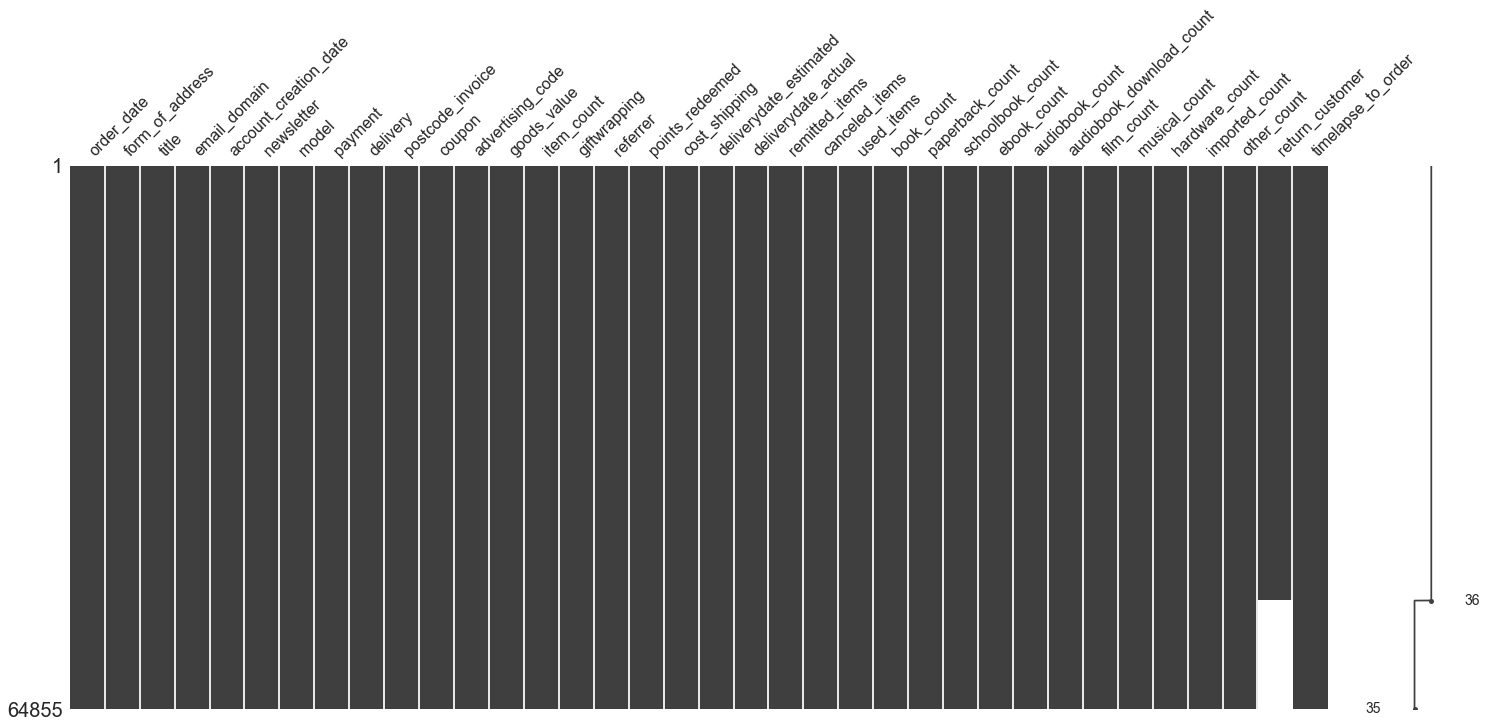

In [43]:
msno.matrix(comdata)

Now we dont have any missing value apart from the missing values of return_customer related to test dataset which is the main purpose of this prediction.

## Creating new variables and deleting not useful variables

In [44]:
## points_redemed : All observations take the value 0 and therefore this variable has no effect and should be deleted
comdata.points_redeemed.unique()

array([0], dtype=int64)

In [45]:
comdata = comdata.drop('points_redeemed', 1)
## Converting deliverydate_estimated and deliverydate_actual to datetime
comdata.deliverydate_estimated = pd.to_datetime(comdata.deliverydate_estimated, format='%Y-%m-%d')
comdata.deliverydate_actual = pd.to_datetime(comdata.deliverydate_actual, format='%Y-%m-%d')
##1 estimated_delivery_duration = deliverydate_estimated - order_date
comdata['estimated_delivery_duration'] = (comdata['deliverydate_estimated'] - comdata['order_date']).abs().dt.days
#2 actual_delivery_duration = deliverydate_actual - order_date
comdata['actual_delivery_duration'] = (comdata['deliverydate_actual'] - comdata['order_date']).abs().dt.days
#3 delivery_gap = deliverydate_actual - deliverydate_estimated
comdata['delivery_gap'] = pd.to_numeric(comdata['estimated_delivery_duration']) - pd.to_numeric(comdata['actual_delivery_duration'])
#4 Group remitted and canceled items together : total_remitted_canceled = remitted_items + canceled_items
comdata['total_remitted_canceled'] = comdata['remitted_items'] + comdata['canceled_items']
#5 delete both remitted_items and canceled_items
comdata = comdata.drop('remitted_items', 1)
comdata = comdata.drop('canceled_items', 1)
#6 create a new variable : purchased_items_count = item_count - total_remitted_canceled
comdata['purchased_items_count'] = comdata['item_count'] - comdata['total_remitted_canceled']
#7 Create multiple_items : a dummy variable that take the value 1 if multiple items were purchased and 0 if only 1 or 0 items purchased / 0 possible when order then canel or remit
comdata['multiple_items'] = (comdata['purchased_items_count'] > 1).astype(int)
comdata.head(50)

,order_date,form_of_address,title,email_domain,account_creation_date,newsletter,model,payment,delivery,postcode_invoice,...,imported_count,other_count,return_customer,timelapse_to_order,estimated_delivery_duration,actual_delivery_duration,delivery_gap,total_remitted_canceled,purchased_items_count,multiple_items
ID,,,,,,,,,,,,,,,,,,,,,
1,2013-12-01,Mr,0,web.de,2013-12-01,0,2,Transfer from current account,0,58,...,0,0,0.0,0,2,1,1,0,2,1
2,2013-12-16,Mrs,0,gmx.de,2013-12-16,0,1,Cash payment,1,34,...,0,0,0.0,0,14,49,-35,2,0,0
3,2013-08-19,Mr,0,other,2013-08-19,0,1,Invoice,0,51,...,1,0,0.0,0,14,9,5,0,1,0
4,2013-06-16,Other,0,t-online.de,2013-06-16,0,1,Invoice,0,25,...,0,0,0.0,0,1,1,0,0,2,1
5,2013-08-08,Mr,0,arcor.de,2013-08-08,0,1,Cash payment,1,41,...,0,0,0.0,0,3,0,3,0,2,1
6,2013-08-10,Mr,0,other,2013-08-10,0,1,Invoice,0,95,...,0,0,0.0,0,2,1,1,0,3,1
7,2013-12-21,Mr,0,other,2013-12-21,0,3,Cash payment,1,78,...,0,0,0.0,0,2,1,1,0,1,0
8,2013-09-04,Mr,0,web.de,2013-09-04,0,3,Cash payment,1,77,...,0,0,0.0,0,1,0,1,0,2,1
9,2013-06-25,Mr,0,other,2013-06-24,0,1,Transfer from credit card,0,86,...,0,0,0.0,1,1,2,-1,0,4,1


In [46]:
##8 Create a "christmas" dummy varible that take the value 1 if order made between 2013-11-17 and 2013-12-24
comdata['order_date'] = pd.to_datetime(comdata['order_date'])
mask = (comdata['order_date'] >= '2013-11-17') & (comdata['order_date'] <= '2013-12-24')
print(comdata.loc[mask])
comdata.loc[mask,'christmas']=1
comdata.head(100)

      order_date form_of_address  title email_domain account_creation_date  \
ID                                                                           
1     2013-12-01              Mr      0       web.de            2013-12-01   
2     2013-12-16             Mrs      0       gmx.de            2013-12-16   
7     2013-12-21              Mr      0        other            2013-12-21   
11    2013-12-20             Mrs      0       web.de            2013-12-20   
17    2013-12-08              Mr      0    posteo.de            2013-12-08   
18    2013-12-20             Mrs      0        other            2013-12-20   
19    2013-11-18             Mrs      0  t-online.de            2013-11-18   
23    2013-11-27         Company      0  t-online.de            2013-11-21   
30    2013-12-19             Mrs      0       gmx.de            2013-12-19   
33    2013-11-27             Mrs      0  t-online.de            2013-11-27   
38    2013-12-16             Mrs      0   freenet.de            

,order_date,form_of_address,title,email_domain,account_creation_date,newsletter,model,payment,delivery,postcode_invoice,...,other_count,return_customer,timelapse_to_order,estimated_delivery_duration,actual_delivery_duration,delivery_gap,total_remitted_canceled,purchased_items_count,multiple_items,christmas
ID,,,,,,,,,,,,,,,,,,,,,
1,2013-12-01,Mr,0,web.de,2013-12-01,0,2,Transfer from current account,0,58,...,0,0.0,0,2,1,1,0,2,1,1.0
2,2013-12-16,Mrs,0,gmx.de,2013-12-16,0,1,Cash payment,1,34,...,0,0.0,0,14,49,-35,2,0,0,1.0
3,2013-08-19,Mr,0,other,2013-08-19,0,1,Invoice,0,51,...,0,0.0,0,14,9,5,0,1,0,NaN
4,2013-06-16,Other,0,t-online.de,2013-06-16,0,1,Invoice,0,25,...,0,0.0,0,1,1,0,0,2,1,NaN
5,2013-08-08,Mr,0,arcor.de,2013-08-08,0,1,Cash payment,1,41,...,0,0.0,0,3,0,3,0,2,1,NaN
6,2013-08-10,Mr,0,other,2013-08-10,0,1,Invoice,0,95,...,0,0.0,0,2,1,1,0,3,1,NaN
7,2013-12-21,Mr,0,other,2013-12-21,0,3,Cash payment,1,78,...,0,0.0,0,2,1,1,0,1,0,1.0
8,2013-09-04,Mr,0,web.de,2013-09-04,0,3,Cash payment,1,77,...,0,0.0,0,1,0,1,0,2,1,NaN
9,2013-06-25,Mr,0,other,2013-06-24,0,1,Transfer from credit card,0,86,...,0,0.0,1,1,2,-1,0,4,1,NaN


In [47]:
comdata['christmas'].fillna(0, inplace=True)
comdata.head(20)

,order_date,form_of_address,title,email_domain,account_creation_date,newsletter,model,payment,delivery,postcode_invoice,...,other_count,return_customer,timelapse_to_order,estimated_delivery_duration,actual_delivery_duration,delivery_gap,total_remitted_canceled,purchased_items_count,multiple_items,christmas
ID,,,,,,,,,,,,,,,,,,,,,
1,2013-12-01,Mr,0,web.de,2013-12-01,0,2,Transfer from current account,0,58,...,0,0.0,0,2,1,1,0,2,1,1.0
2,2013-12-16,Mrs,0,gmx.de,2013-12-16,0,1,Cash payment,1,34,...,0,0.0,0,14,49,-35,2,0,0,1.0
3,2013-08-19,Mr,0,other,2013-08-19,0,1,Invoice,0,51,...,0,0.0,0,14,9,5,0,1,0,0.0
4,2013-06-16,Other,0,t-online.de,2013-06-16,0,1,Invoice,0,25,...,0,0.0,0,1,1,0,0,2,1,0.0
5,2013-08-08,Mr,0,arcor.de,2013-08-08,0,1,Cash payment,1,41,...,0,0.0,0,3,0,3,0,2,1,0.0
6,2013-08-10,Mr,0,other,2013-08-10,0,1,Invoice,0,95,...,0,0.0,0,2,1,1,0,3,1,0.0
7,2013-12-21,Mr,0,other,2013-12-21,0,3,Cash payment,1,78,...,0,0.0,0,2,1,1,0,1,0,1.0
8,2013-09-04,Mr,0,web.de,2013-09-04,0,3,Cash payment,1,77,...,0,0.0,0,1,0,1,0,2,1,0.0
9,2013-06-25,Mr,0,other,2013-06-24,0,1,Transfer from credit card,0,86,...,0,0.0,1,1,2,-1,0,4,1,0.0


In [19]:
type(comdata.christmas)

pandas.core.series.Series

In [21]:
comdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64855 entries, 1 to 64855
Data columns (total 40 columns):
order_date                     64855 non-null datetime64[ns]
form_of_address                64855 non-null object
title                          64855 non-null int64
email_domain                   64855 non-null object
account_creation_date          64855 non-null datetime64[ns]
newsletter                     64855 non-null int64
model                          64855 non-null int64
payment                        64855 non-null object
delivery                       64855 non-null int64
postcode_invoice               64855 non-null int64
coupon                         64855 non-null int64
advertising_code               64855 non-null object
goods_value                    64855 non-null int64
item_count                     64855 non-null int64
giftwrapping                   64855 non-null int64
referrer                       64855 non-null int64
cost_shipping                  64855 

Now we will be setting variables to their correspondant types where dates as datetime and convert object type to categorial type (including return customer) and the rest to numeric

## Converting variable types

In [48]:
 def cleanData(comdata):
    # Convert Dates
    comdata.order_date = pd.to_datetime(comdata.order_date, format='%Y-%m-%d')
    comdata.account_creation_date = pd.to_datetime(comdata.account_creation_date, format='%Y-%m-%d')
    comdata.deliverydate_estimated = pd.to_datetime(comdata.deliverydate_estimated, format='%Y-%m-%d')
    comdata.deliverydate_actual = pd.to_datetime(comdata.deliverydate_actual, format='%Y-%m-%d')
    # Convert Categories
    comdata.form_of_address = comdata.form_of_address.astype('category')
    comdata.email_domain = comdata.email_domain.astype('category')
    comdata.payment = comdata.payment.astype('category')
    comdata.advertising_code = comdata.advertising_code.astype('category')
    comdata.title = comdata.title.astype('category')
    comdata.newsletter = comdata.newsletter.astype('category')
    comdata.model = comdata.model.astype('category')
    comdata.delivery = comdata.delivery.astype('category')
    comdata.postcode_invoice = comdata.postcode_invoice.astype('category')
    comdata.coupon = comdata.coupon.astype('category')
    comdata.goods_value = comdata.goods_value.astype('category')
    comdata.giftwrapping = comdata.giftwrapping.astype('category')
    comdata.referrer = comdata.referrer.astype('category')
    comdata.cost_shipping = comdata.cost_shipping.astype('category')
    comdata.return_customer = comdata.return_customer.astype('category')
    comdata.multiple_items = comdata.multiple_items.astype('category')
    comdata.christmas = comdata.christmas.astype('category')
    return(comdata)
comdata = cleanData(comdata)
    

In [49]:
comdata.info()
### one hot encoding categorial values with LabelEncoder
from sklearn.preprocessing import LabelEncoder, scale
le = LabelEncoder()
obj_cols = comdata.select_dtypes(include=['category'])
for i in obj_cols:
    comdata[i] = le.fit_transform(comdata[i])
comdata.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64855 entries, 1 to 64855
Data columns (total 40 columns):
order_date                     64855 non-null datetime64[ns]
form_of_address                64855 non-null category
title                          64855 non-null category
email_domain                   64855 non-null category
account_creation_date          64855 non-null datetime64[ns]
newsletter                     64855 non-null category
model                          64855 non-null category
payment                        64855 non-null category
delivery                       64855 non-null category
postcode_invoice               64855 non-null category
coupon                         64855 non-null category
advertising_code               64855 non-null category
goods_value                    64855 non-null category
item_count                     64855 non-null int64
giftwrapping                   64855 non-null category
referrer                       64855 non-null category
co

,order_date,form_of_address,title,email_domain,account_creation_date,newsletter,model,payment,delivery,postcode_invoice,...,other_count,return_customer,timelapse_to_order,estimated_delivery_duration,actual_delivery_duration,delivery_gap,total_remitted_canceled,purchased_items_count,multiple_items,christmas
ID,,,,,,,,,,,,,,,,,,,,,
1,2013-12-01,1,0,10,2013-12-01,0,1,3,0,57,...,0,0,0,2,1,1,0,2,1,1
2,2013-12-16,2,0,4,2013-12-16,0,0,0,1,34,...,0,0,0,14,49,-35,2,0,0,1
3,2013-08-19,1,0,7,2013-08-19,0,0,1,0,50,...,0,0,0,14,9,5,0,1,0,0
4,2013-06-16,3,0,9,2013-06-16,0,0,1,0,25,...,0,0,0,1,1,0,0,2,1,0
5,2013-08-08,1,0,1,2013-08-08,0,0,0,1,41,...,0,0,0,3,0,3,0,2,1,0
6,2013-08-10,1,0,7,2013-08-10,0,0,1,0,93,...,0,0,0,2,1,1,0,3,1,0
7,2013-12-21,1,0,7,2013-12-21,0,2,0,1,76,...,0,0,0,2,1,1,0,1,0,1
8,2013-09-04,1,0,10,2013-09-04,0,2,0,1,75,...,0,0,0,1,0,1,0,2,1,0
9,2013-06-25,1,0,7,2013-06-24,0,0,2,0,84,...,0,0,1,1,2,-1,0,4,1,0


In [50]:
comdata.postcode_invoice.describe()

count    64855.000000
mean        47.868923
std         23.539752
min          0.000000
25%         30.000000
50%         46.000000
75%         64.000000
max         97.000000
Name: postcode_invoice, dtype: float64

Now splitting back Train and Test data for exploratory Data Analysis and Base Models in the next steps

In [58]:
comdata[:51884]

,order_date,form_of_address,title,email_domain,account_creation_date,newsletter,model,payment,delivery,postcode_invoice,...,other_count,return_customer,timelapse_to_order,estimated_delivery_duration,actual_delivery_duration,delivery_gap,total_remitted_canceled,purchased_items_count,multiple_items,christmas
ID,,,,,,,,,,,,,,,,,,,,,
1,2013-12-01,1,0,10,2013-12-01,0,1,3,0,57,...,0,0,0,2,1,1,0,2,1,1
2,2013-12-16,2,0,4,2013-12-16,0,0,0,1,34,...,0,0,0,14,49,-35,2,0,0,1
3,2013-08-19,1,0,7,2013-08-19,0,0,1,0,50,...,0,0,0,14,9,5,0,1,0,0
4,2013-06-16,3,0,9,2013-06-16,0,0,1,0,25,...,0,0,0,1,1,0,0,2,1,0
5,2013-08-08,1,0,1,2013-08-08,0,0,0,1,41,...,0,0,0,3,0,3,0,2,1,0
6,2013-08-10,1,0,7,2013-08-10,0,0,1,0,93,...,0,0,0,2,1,1,0,3,1,0
7,2013-12-21,1,0,7,2013-12-21,0,2,0,1,76,...,0,0,0,2,1,1,0,1,0,1
8,2013-09-04,1,0,10,2013-09-04,0,2,0,1,75,...,0,0,0,1,0,1,0,2,1,0
9,2013-06-25,1,0,7,2013-06-24,0,0,2,0,84,...,0,0,1,1,2,-1,0,4,1,0


In [59]:
comdata[51884:]


,order_date,form_of_address,title,email_domain,account_creation_date,newsletter,model,payment,delivery,postcode_invoice,...,other_count,return_customer,timelapse_to_order,estimated_delivery_duration,actual_delivery_duration,delivery_gap,total_remitted_canceled,purchased_items_count,multiple_items,christmas
ID,,,,,,,,,,,,,,,,,,,,,
51885,2013-06-12,3,0,10,2013-06-12,0,0,3,0,90,...,0,8641,0,4,1,3,0,2,1,0
51886,2013-09-22,2,0,9,2013-09-22,0,2,3,0,63,...,0,8642,0,42,9,33,0,1,0,0
51887,2013-09-19,2,0,2,2013-09-19,0,0,2,0,74,...,0,8643,0,3,0,3,0,1,0,0
51888,2013-04-18,2,0,3,2013-04-18,0,1,2,0,51,...,0,8644,0,4,1,3,1,6,1,0
51889,2013-09-08,2,0,12,2013-09-08,0,2,3,0,23,...,0,8645,0,2,1,1,0,2,1,0
51890,2013-12-29,2,0,7,2013-12-29,1,1,1,0,41,...,0,8646,0,2,1,1,0,2,1,0
51891,2013-12-08,0,0,7,2013-12-08,0,2,0,1,77,...,0,8647,0,367,8,359,0,1,0,1
51892,2013-04-06,2,0,9,2013-04-06,0,0,2,0,22,...,0,8648,0,4,1,3,0,1,0,0
51893,2013-04-18,2,0,4,2013-04-18,0,0,1,0,61,...,0,8649,0,3,0,3,0,1,0,0


In [53]:
train = comdata[:51884]
test = comdata[51884:]

In [61]:

test.return_customer = np.nan
test.head(10)

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,order_date,form_of_address,title,email_domain,account_creation_date,newsletter,model,payment,delivery,postcode_invoice,...,other_count,return_customer,timelapse_to_order,estimated_delivery_duration,actual_delivery_duration,delivery_gap,total_remitted_canceled,purchased_items_count,multiple_items,christmas
ID,,,,,,,,,,,,,,,,,,,,,
51885,2013-06-12,3,0,10,2013-06-12,0,0,3,0,90,...,0,NaN,0,4,1,3,0,2,1,0
51886,2013-09-22,2,0,9,2013-09-22,0,2,3,0,63,...,0,NaN,0,42,9,33,0,1,0,0
51887,2013-09-19,2,0,2,2013-09-19,0,0,2,0,74,...,0,NaN,0,3,0,3,0,1,0,0
51888,2013-04-18,2,0,3,2013-04-18,0,1,2,0,51,...,0,NaN,0,4,1,3,1,6,1,0
51889,2013-09-08,2,0,12,2013-09-08,0,2,3,0,23,...,0,NaN,0,2,1,1,0,2,1,0
51890,2013-12-29,2,0,7,2013-12-29,1,1,1,0,41,...,0,NaN,0,2,1,1,0,2,1,0
51891,2013-12-08,0,0,7,2013-12-08,0,2,0,1,77,...,0,NaN,0,367,8,359,0,1,0,1
51892,2013-04-06,2,0,9,2013-04-06,0,0,2,0,22,...,0,NaN,0,4,1,3,0,1,0,0
51893,2013-04-18,2,0,4,2013-04-18,0,0,1,0,61,...,0,NaN,0,3,0,3,0,1,0,0


Saving train and test into CSV for later use 

In [62]:
train.to_csv('train_final.csv', sep=';')
test.to_csv('test_final.csv', sep=';')

# 3. EDA (exploratory data analysis) and descriptive analysis:

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## key dimensions of the train data

In [67]:

Nb_orders=len(train)
Nb_returningcustomers= (train["return_customer"] == 1).sum()
Nb_nonreturningcustomers=(train["return_customer"] == 0).sum()
print("Total number of orders: "+str(Nb_orders))
print("Total number of returning customers : "+str(Nb_returningcustomers))
print("Percentage of returning customers is: "+str(round((Nb_returningcustomers/Nb_orders)*100,2)))
print("Total number of non returning customers : "+str(Nb_nonreturningcustomers))
print("Percentage of non returning customers is: "+str(round((Nb_nonreturningcustomers/Nb_orders)*100,2)))

Total number of orders: 51884
Total number of returning customers : 9773
Percentage of returning customers is: 18.84
Total number of non returning customers : 42111
Percentage of non returning customers is: 81.16


## some insight from 3 variables ; form of address , goods value and model

count    51884.00
mean         1.50
std          0.82
min          0.00
25%          1.00
50%          1.00
75%          2.00
max          3.00
Name: form_of_address, dtype: float64


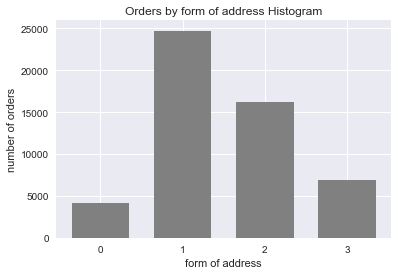

In [78]:
print(train["form_of_address"].describe().round(2))
%matplotlib inline 
a=[int(i) for i in train["form_of_address"]]
bins=range(0,5)
fig, ax = plt.subplots(1,1)
ax.hist(a, bins=bins, align='left', color="grey", rwidth=0.7)
ax.set_xticks(bins[:-1])
plt.title("Orders by form of address Histogram");
plt.xlabel("form of address");
plt.ylabel("number of orders");

In [81]:
# Table of returning customer vs. form of address
returning_formofaddress = pd.crosstab(index=train["return_customer"], 
                           columns=train["form_of_address"])

returning_formofaddress.index= ["non returning","returning"]

returning_formofaddress

form_of_address,0,1,2,3
non returning,3533,20257,13343,4978
returning,568,4475,2842,1888


1 then 2 then 3 then 0 / almost 50% of returning are form 1 and 30% form 2

count    51884.00
mean         1.93
std          1.32
min          0.00
25%          1.00
50%          2.00
75%          3.00
max          4.00
Name: goods_value, dtype: float64


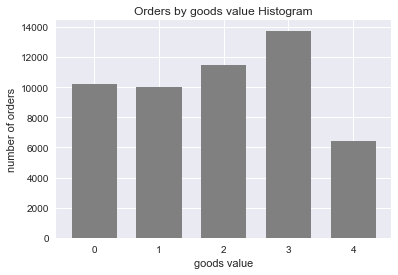

In [83]:
print(train["goods_value"].describe().round(2))
%matplotlib inline 
a=[int(i) for i in train["goods_value"]]
bins=range(0,6)
fig, ax = plt.subplots(1,1)
ax.hist(a, bins=bins, align='left', color="grey", rwidth=0.7)
ax.set_xticks(bins[:-1])
plt.title("Orders by goods value Histogram");
plt.xlabel("goods value");
plt.ylabel("number of orders");

In [82]:
# Table of returning customer vs. goods value
returning_goodsvalue = pd.crosstab(index=train["return_customer"], 
                           columns=train["goods_value"])

returning_goodsvalue.index= ["non returning","returning"]

returning_goodsvalue

goods_value,0,1,2,3,4
non returning,8227,8331,9568,11014,4971
returning,1967,1652,1935,2738,1481


returning value 3 the highest with 2738 out of 9773 returning customers (around 27%) / value 0 and value 2 come in the second place (20%) then 1 then 4 
=> form of address 1 with good value 3 or 0 or 2 have high probability of returning

count    51884.00
mean         0.65
std          0.82
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          2.00
Name: model, dtype: float64


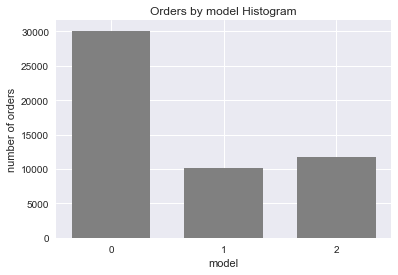

In [87]:
print(train["model"].describe().round(2))
%matplotlib inline 
a=[int(i) for i in train["model"]]
bins=range(0,4)
fig, ax = plt.subplots(1,1)
ax.hist(a, bins=bins, align='left', color="grey", rwidth=0.7)
ax.set_xticks(bins[:-1])
plt.title("Orders by model Histogram");
plt.xlabel("model");
plt.ylabel("number of orders");

In [88]:
# Table of returning customer vs. model
returning_model = pd.crosstab(index=train["return_customer"], 
                           columns=train["model"])

returning_model.index= ["non returning","returning"]

returning_model

model,0,1,2
non returning,24871,8185,9055
returning,5212,1896,2665


model 0 account for more than 50% of returning customer then followen by model 2 (around 23%) then finally model 1

count    51884.00
mean         0.16
std          0.37
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: coupon, dtype: float64


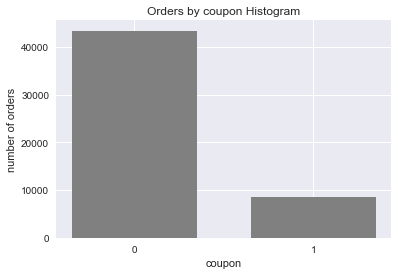

In [99]:
print(train["coupon"].describe().round(2))
%matplotlib inline 
a=[int(i) for i in train["coupon"]]
bins=range(0,3)
fig, ax = plt.subplots(1,1)
ax.hist(a, bins=bins, align='left', color="grey", rwidth=0.7)
ax.set_xticks(bins[:-1])
plt.title("Orders by coupon Histogram");
plt.xlabel("coupon");
plt.ylabel("number of orders");

In [100]:
# Table of returning customer vs. coupon
returning_coupon = pd.crosstab(index=train["return_customer"], 
                           columns=train["coupon"])

returning_coupon.index= ["non returning","returning"]

returning_coupon

coupon,0,1
non returning,35031,7080
returning,8385,1388


Clearly the issue here is the high number of customers or orders using coupon ( value 1 ) but not returning in the next 90 days which leads to wasting coupons. Out of the returning customers only 1388 (around 14%) used coupons.

## some descriptive statistics

In [98]:
train.mean()

form_of_address                 1.497572
title                           0.006649
email_domain                    6.736836
newsletter                      0.167508
model                           0.646076
payment                         1.332819
delivery                        0.203435
postcode_invoice               47.902070
coupon                          0.163210
advertising_code                0.198346
goods_value                     1.928398
item_count                      2.015438
giftwrapping                    0.004356
referrer                        0.414540
cost_shipping                   0.149911
used_items                      0.069270
book_count                      0.902282
paperback_count                 0.397811
schoolbook_count                0.284461
ebook_count                     0.018137
audiobook_count                 0.045563
audiobook_download_count        0.181250
film_count                      0.027311
musical_count                   0.021471
hardware_count  

mean remitted and canceled items from data is 0.12 which means out of 100 orders , an average of 12 are either remitted or canceled and this is a high rate.
Average purchased items count is almsot 2 items per order 
Average actual delivery duration is 6 days but the gap between actual and estimated is remarkable ; it is 18 days on average.
20% of all orders are during chirstmas period which might explain the one time order with no repurchase in the next 90 days 
Timelapse to order is 1.4 days on average from account creation to first order ( this reflects that most orders have been made the same day as account creation)
Out of product type count : book count is the highest ( mean equals 0.9) followed by paperback count and then school book count.
Finally, coupon is used on average 0.16 which mean 16 times out of 100 orders.

## Autocorrelation analysis

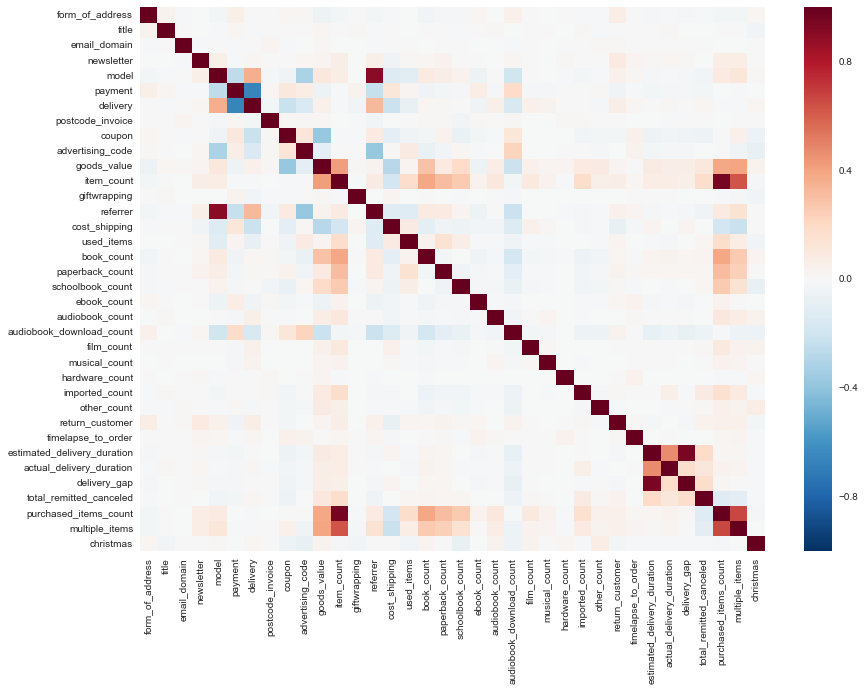

In [56]:

plt.figure(figsize=(14, 10))
sns.heatmap(train.corr())

We have positive autocorrelation between items_count and purchased_items_count which was expected. However, we have a positive autocorrelation between model and referrer. Finally this positive autocorrelation also exists between delivery gap and estimated delivery duration. 
A remarkable negative autocorrelation exists between payment and delivery variables.

# 4. Feature engineering / Cross Validation / Learning from Data


## importing libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, make_scorer, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.externals import joblib

%matplotlib inline

## Creating customer chrun/retention prediction algorithm/app

In [ ]:
class ENSAEPROJECT(object):
    def __init__(self):
        # Data
        self.X_train = None
        self.y_train = None
        self.X_train_cv = None
        self.X_valid_cv = None
        self.y_train_cv = None
        self.y_valid_cv = None
        self.column_names = None

        self.X_test = None
        self.yhat = None
        
        self.thresholds = None

        # Classifiers
        self.clf = None
        self.clf_cv = None
        
        # Cost matrix
        self.cm = np.array([[3., 0.], [-10., 0.]])
        
        # variables to be set
        self.rs = 90049
        self.save_model = False

        ######### Feature Selection #########
        self.manual_features_to_remove = ["item_count"]
        self.feature_correlation_removal = False
        self.feature_correlation_threshold = 0.7
        self.automatic_feature_selection = False
        self.automatic_feature_threshold = 0.005

        ######### Oversampling #########
        # non-standard package: http://contrib.scikit-learn.org/imbalanced-learn/index.html
        self.oversample_method = "none"

        ######### Cross-Valdiation #########
        self.do_cv = False # this takes a long time
        self.cv_num_folds = 4
        self.cv_validation_frac = 0.15
        self.cv_rs_iters = 20
        self.cost_func = self.project_costs # bads_costs, roc_auc_score
        self.score_func = self.project_scorer # bads_scorer, roc_auc_score
        self.set_model("rf") # "rf" or "gbc" or "linear"

    def set_model(self, model_to_use):
        self.model_to_use = model_to_use
        ######### Model Selection #########
        if model_to_use == "rf":
            # Random Forest Classifier
            from sklearn.ensemble import RandomForestClassifier
            self.clf = RandomForestClassifier(random_state=self.rs)
            self.automatic_feature_selection_params = {'n_estimators': 250, 'verbose': 0, 'n_jobs': 3}
            self.clf_default_params = {'min_samples_split': 2, 'n_estimators': 250, 
                                       'min_samples_leaf': 9, 'criterion': 'gini', 
                                       'verbose': 0, 'oob_score': True, 'n_jobs': 3}
            self.cv_param_grid = {'n_estimators':[100, 250, 500], 
                                  'min_samples_split':[2, 4, 8], 
                                  'min_samples_leaf': [1, 3, 9, 15], 
                                  'n_jobs': [3]}
        elif model_to_use == "gbc":
            # Gradient Boosting Classifier
            from sklearn.ensemble import GradientBoostingClassifier
            self.clf = GradientBoostingClassifier(random_state=self.rs)
            self.automatic_feature_selection_params = {'n_estimators': 50, 'verbose': 1}
            self.clf_default_params = {'learning_rate': 0.1, 'max_depth': 3, 
                                       'n_estimators': 100, 'verbose': 1}
            self.cv_param_grid = {'n_estimators':[50, 100, 250, 500], 
                                  'learning_rate':[0.05, 0.1, .25], 
                                  'max_depth': [3, 5, 9]}
        elif model_to_use == "linear":
            # Logistic Regression Classifier
            from sklearn import linear_model
            self.clf = linear_model.LogisticRegression()
            self.clf_default_params = {'penalty': 'l1'}
            self.cv_param_grid = {'penalty':['l1', 'l2'], 'C': 2 ** np.linspace(-3, 5, 17), 'n_jobs': [3]}
        else:
            print("Please Set The Model")

    def simple_oversample_idx(self, y):
        y_idx_0 = np.where(y == 0)[0]
        y_idx_1 = np.random.choice(np.where(y == 1)[0], size=y_idx_0.shape[0], replace=True)
        ret_cust_idx = []
        ret_cust_idx.extend(y[y_idx_0])
        ret_cust_idx.extend(y[y_idx_1])
        return(ret_cust_idx)

    def project_costs(self, y_t, yhat):
        N = yhat.shape[0]
        C = confusion_matrix(y_t, yhat)
        return(np.multiply(C, self.cm).sum() / N)

    def project_scorer(self, y_t, yhat_prob):
        thresholds = np.linspace(0.01, 0.99)
        costs = [self.project_costs(y_t, yhat_prob[:,1] > threshold) for threshold in thresholds]
        self.thresholds.append(thresholds[np.argmax(costs)])
        return(np.max(costs))

    def find_corr_features(self, df, threshold = 0.7):
        cols = df.columns.values.tolist()
        corr_mat = df.corr()
        corr_items = np.where(np.abs(np.triu(corr_mat, k=1)) > threshold)
        cols_removed = []
        for corr_item in list(set([cols[max(item)] for item in zip(*corr_items)])):
            cols_removed.append(corr_item)
            cols.remove(corr_item)
        print("Removing Columns:", ", ".join(cols_removed))
        return(cols)

    
    def create_datasets(self, 
                        train = "train_final.csv", 
                        test = "test_final.csv"):
        train = pd.read_csv(train, sep=";", decimal=',', index_col="ID")
        # Create Feature List
        features_to_use = train.columns.values.tolist()
        features_to_use.remove("return_customer")
        for ftr in self.manual_features_to_remove:
            if ftr in features_to_use:
                features_to_use.remove(ftr)
            elif "x_"+ftr in features_to_use:
                features_to_use.remove("x_"+ftr)
        # remove dates if not converted to ints
        for date_feature, v in train.dtypes.items():
            if v == "datetime64[ns]": 
                features_to_use.remove(date_feature)
        train = train[features_to_use + ["return_customer"]]
        # Visualize Correlation before splitting out dummy variables
        if self.feature_correlation_removal: 
            sns.heatmap(train.drop("return_customer", 1).corr())
            plt.show()
        # Split out dummy variables
        train = pd.get_dummies(train)
        # feature Correlation Removal
        if self.feature_correlation_removal:
            print("Removing correlated features...")
            noncorr_cols = self.find_corr_features(train.drop("return_customer", 1), 
                                                   self.feature_correlation_threshold)
            train = train[noncorr_cols + ["return_customer"]]
        # set train datasets
        self.X_train, self.y_train = train.drop("return_customer", 1).values, train["return_customer"].values
        self.column_names = train.columns

        test = pd.read_csv(test, sep=";", decimal=',', index_col="ID")
        test = pd.get_dummies(test)
        # The following line gives the test set the same columns as the training set. 
        # This simultaneously adds columns to the test set and sets the values in those columns to 0 and 
        # drops any columns in the test set that did not exist in the training set.
        print("Imposing train column structure on test...")
        test = test.reindex(columns = self.column_names, fill_value=0)
        test.drop("return_customer", 1, inplace=True)
        # set test dataset
        self.X_test = test.values
        self.X_train_cv, self.X_valid_cv, self.y_train_cv, self.y_valid_cv = train_test_split(self.X_train, 
                                                                                              self.y_train, 
                                                                                              test_size = self.cv_validation_frac,
                                                                                              stratify = self.y_train,
                                                                                              random_state = self.rs)


    def oversample(self):
        if self.oversample_method == "simple":
            # oversampling with replacement of the minority group to equalize the size of the minority and 
            # majority group
            print("Simple oversampling...")
            # Create the Hyper-Parameter Cross-Validation train and test sets
            ret_cust_idx_cv = self.simple_oversample_idx(self.y_train_cv)
            self.X_train_cv, self.y_train_cv = self.X_train_cv[ret_cust_idx_cv,:], self.y_train_cv[ret_cust_idx_cv]
            # Create the full train and test sets
            ret_cust_idx = simple_oversample_idx(self.y_train)
            self.X_train, self.y_train = self.X_train[ret_cust_idx,:], self.y_train[ret_cust_idx]
        elif self.oversample_method == "SMOTE":
            # https://www.jair.org/media/953/live-953-2037-jair.pdf
            from imblearn.over_sampling import SMOTE

            print("SMOTE oversampling...")
            sm = SMOTE(kind='regular', random_state = self.rs)
            # Create the Hyper-Parameter Cross-Validation train and test sets
            self.X_train_cv, self.y_train_cv = sm.fit_sample(self.X_train_cv, self.y_train_cv)
            # Create the full train and test sets
            self.X_train, self.y_train = sm.fit_sample(self.X_train, self.y_train)
        elif self.oversample_method == "SMOTETomek":
            from imblearn.combine import SMOTETomek

            print("SMOTE + Tomek Links oversampling...")
            sm = SMOTETomek(random_state = rs)
            # Create the Hyper-Parameter Cross-Validation train and test sets
            self.X_train_cv, self.y_train_cv = sm.fit_sample(self.X_train_cv, self.y_train_cv)
            # Create the full train and test sets
            self.X_train, self.y_train = sm.fit_sample(self.X_train, self.y_train)
        else:
            print("No oversampling...")

    def automagic_feature_selection(self):
        if self.automatic_feature_selection:
            print("Starting automatic feature selection...")
            # this takes about 10 minutes to run
            self.clf.set_params(**self.automatic_feature_selection_params)
            self.clf.fit(self.X_train, self.y_train)
            important_features = np.where(self.clf.feature_importances_ > self.automatic_feature_threshold)[0].tolist()
            important_features_labels = self.column_names[important_features]
            print("High Importance Features:", ", ".join(important_features_labels.tolist()))
            np.savetxt("output/optimal_features.csv", important_features_labels.values, fmt="%s", delimiter=";")

            self.X_train, self.X_test = self.X_train[:,important_features], self.X_test[:,important_features]
            self.X_train_cv, self.X_valid_cv = self.X_train_cv[:,important_features], self.X_valid_cv[:,important_features]

        else:
            print("No automatic feature selection...")

    def run_model(self):
        self.thresholds = []
        if self.do_cv:
            # this can take a LONG time
            print("Searching for best parameters with CV search...")
            self.clf_cv = RandomizedSearchCV(self.clf, self.cv_param_grid, 
                                             scoring = make_scorer(self.score_func, needs_proba=True), 
                                             cv = self.cv_num_folds, 
                                             n_iter = self.cv_rs_iters, 
                                             random_state = self.rs, verbose = 1)
            self.clf_cv.fit(self.X_train_cv, self.y_train_cv)
            #clf_rf_cv.cv_results_
            joblib.dump(self.clf_cv.cv_results_, 'output/clf_rf_cv.results.pkl')
            print("Cross Valdiation Report:")
            print(self.clf_cv.best_params_)
            print("Best Score:", self.clf_cv.best_score_)
            # Plot Expected ROI per Customer
            plt.errorbar(range(self.cv_rs_iters), 
                         self.clf_cv.cv_results_["mean_test_score"], 
                         yerr = self.clf_cv.cv_results_["std_test_score"], 
                         fmt="o")
            plt.margins(0.03)
            plt.show()

            # Train and Validate a random forest classifier with the best parameters
            yhat_valid_prob = self.clf_cv.predict_proba(self.X_valid_cv)

            params_star = self.clf_cv.best_params_
            self.clf.set_params(**params_star)
        else:
            self.clf.set_params(**self.clf_default_params)
            self.clf.fit(self.X_train_cv, self.y_train_cv)
            yhat_valid_prob = self.clf.predict_proba(self.X_valid_cv)

        print("Validation Summary:")
        print("Calculate Optimal Threshold")
        thresholds = np.linspace(0.01, 0.99, 197)
        costs = [self.project_costs(self.y_valid_cv, yhat_valid_prob[:,1] > threshold) for threshold in thresholds]
        threshold_star = thresholds[np.argmax(costs)]
        # Plot
        plt.plot(thresholds, costs)
        plt.show()
        print("Threshold:", threshold_star)
        yhat_valid = yhat_valid_prob[:,1] > threshold_star
        print("Average ROI:", self.cost_func(self.y_valid_cv, yhat_valid))
        print("ROC Score:", roc_auc_score(self.y_valid_cv, yhat_valid_prob[:,1]))
        print("Validation Return Customers: {} of {} ({}%)".format(np.sum(yhat_valid), 
                                                                   len(yhat_valid), 
                                                                   np.round(100*np.sum(yhat_valid)/len(yhat_valid),2) ))
        print("confusion matrix:",confusion_matrix(self.y_valid_cv, yhat_valid))
        # Train model with all data and use on the Test set
        self.clf.fit(self.X_train, self.y_train)
        yhat_test_proba = self.clf.predict_proba(self.X_test)
        yhat_test = yhat_test_proba[:,1] > threshold_star
        np.savetxt("output/test_return_customer.csv", 
                   np.c_[range(yhat_test.shape[0]), yhat_test.astype(int)], 
                   fmt='%i', delimiter=",")
        print("Testing Return Customers: {} of {} ({}%)".format(np.sum(yhat_test), 
                                                                len(yhat_test), 
                                                                np.round(100*np.sum(yhat_test)/len(yhat_test),2) ))
        self.yhat = yhat_test
        if self.save_model:
            joblib.dump(self.clf, 'output/model_final.pkl')
            #clf_rf = joblib.load('output/model_final.pkl')
    def pca_analysis(self, X, y, num_PC = 5, recalc_PC = True):
        # PCA Analysis of Results
        from sklearn.decomposition import PCA
        from sklearn.preprocessing import scale
        train_scaled = scale(X)

        if recalc_PC:
            self.pca = PCA(n_components=num_PC)
            self.pca.fit(train_scaled)
        else:
            print("Using previous eigenvectors to rotate data...")
        train_rotated = self.pca.transform(train_scaled)
        df_train = pd.DataFrame(train_rotated)
        df_train["colors"] = ["returning" if y_i else "non-returning" for y_i in y]
        sns.pairplot(df_train, hue = "colors", diag_kind="kde", vars=["non-returning", "returning"])
        plt.show()

## predictive algorithm environment and variables selection

In [103]:
#  Variables and Model Selection have to be specified when running the finaly algorithm application like input entries 
# the following break down explains what have to be specified to run the predictive application with different parameters 
# and models

#####################################
#
#  Variable Selection
#
#####################################
## Example of Random forest variables and parameters specifications:
params_rf = {
    ######### Set Seed #########
    "rs": 90049,
    "save_model": False,

    ######### Feature Selection #########
    "manual_features_to_remove": ["item_count"],
    "feature_correlation_removal": True,
    "feature_correlation_threshold": 0.7,
    "automatic_feature_selection": True,
    "automatic_feature_threshold": 0.005,

    ######### Oversampling #########
    # non-standard package: http://contrib.scikit-learn.org/imbalanced-learn/index.html
    "oversample_method": "none",

    ######### Cross-Valdiation #########
    "do_cv": True, # this takes a long time
    "cv_num_folds": 8,
    "cv_validation_frac": 0.15,
    "cv_rs_iters": 10,

    ######### Model Selection #########
    "model_to_use": "rf", # "rf" or "gbc" or "linear"
    "automatic_feature_selection_params": {'n_estimators': 250, 'verbose': 0, 'n_jobs': 3},
    "clf_default_params": {'min_samples_split': 2, 'n_estimators': 250, 
                           'min_samples_leaf': 9, 'criterion': 'gini', 
                           'verbose': 0, 'oob_score': True, 'n_jobs': 3},
    "cv_param_grid": {'n_estimators':[100, 250, 500], 
                      'min_samples_split':[2, 4, 8], 
                      'min_samples_leaf': [1, 3, 9, 15], 
                      'n_jobs': [3]}

}


# 5. Prediction and Evaluation

## 1/Random Forest : no oversampling , no automatic feature selection , no feature correlation removal

No oversampling...
(51884, 1615) (12971, 1615) (44101, 1615) (7783, 1615)
Searching for best parameters with CV search...
Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 152.1min finished


Cross Valdiation Report:
{'n_jobs': 3, 'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 9}
Best Score: 0.78848552187


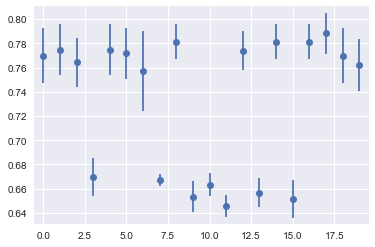

Validation Summary:
Calculate Optimal Threshold


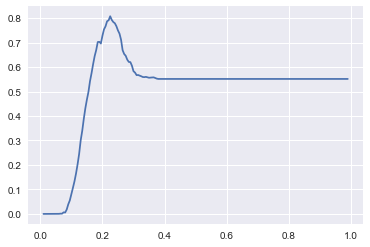

Threshold: 0.225
Average ROI: 0.807400745214
ROC Score: 0.649424148571
Validation Return Customers: 2005 of 7783 (0.2576127457278684%)
[[4928 1389]
 [ 850  616]]
Testing Return Customers: 3489 of 12971 (0.26898465808341687%)


In [120]:
a = ENSAEPROJECT()
# Load and split training  and testing data and create cross validation sets from training data
a.create_datasets()
# Oversample if desired
a.oversample()
# Print size of training sets
print(a.X_train.shape, a.X_test.shape, a.X_train_cv.shape, a.X_valid_cv.shape)
# Change a few variables as a test
a.set_model("rf")
a.do_cv = True
# Run the models
a.run_model()

## 2/Random Forest : no oversampling , automatic feature selection, no feature correlation removal

In [ ]:
a = ENSAEPROJECT()
# Load and split training  and testing data and create cross validation sets from training data
a.create_datasets()
# Oversample if desired
a.oversample()
# Run algorithm-based feature selection
a.automagic_feature_selection()
# Print size of training sets
print(a.X_train.shape, a.X_test.shape, a.X_train_cv.shape, a.X_valid_cv.shape)
# Change a few variables as a test
a.set_model("rf")
a.do_cv = True
# Run the models
a.run_model()

## 3/Random Forest : no oversampling , automatic feature selection, feature correlation removal

In [ ]:
a = ENSAEPROJECT()
# Load and split training  and testing data and create cross validation sets from training data
a.create_datasets()
# Oversample if desired
a.oversample()
# feature correlation removal if desired
a.feature_correlation_removal = True
# Run algorithm-based feature selection
a.automagic_feature_selection()
# Print size of training sets
print(a.X_train.shape, a.X_test.shape, a.X_train_cv.shape, a.X_valid_cv.shape)
# Change a few variables as a test
a.set_model("rf")
a.do_cv = True
# Run the models
a.run_model()